In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from math import sqrt,exp

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


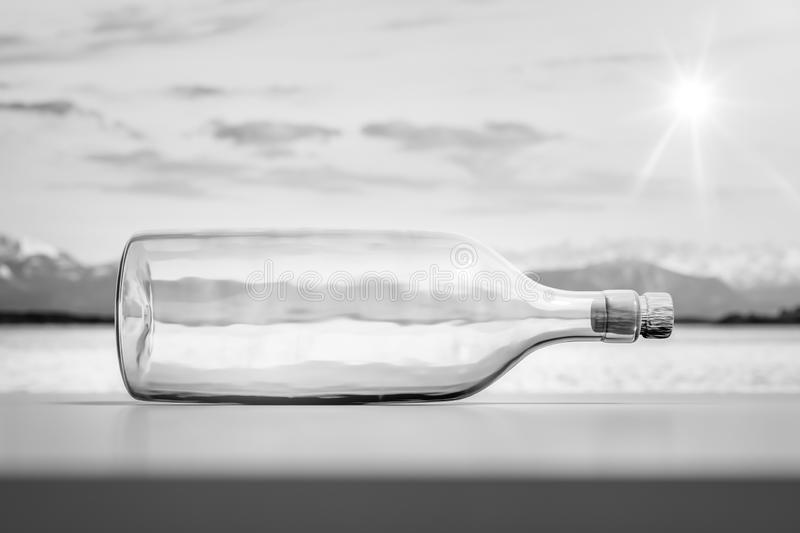

In [13]:
img = cv2.imread("/content/drive/MyDrive/5th sem/image processing/photos/img.jpg",0)
cv2_imshow(img)

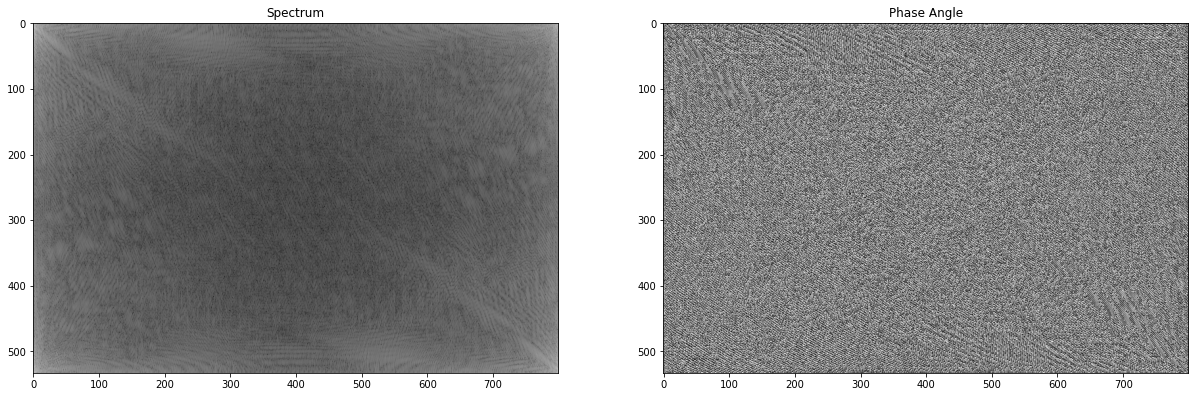

In [14]:
plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)
original = np.fft.fft2(img)
plt.subplot(131), plt.imshow(np.log(np.abs(original)), "gray"), plt.title("Spectrum")
plt.subplot(132), plt.imshow(np.angle(original), "gray"), plt.title("Phase Angle")
plt.show()

In [16]:
img_c2 = np.fft.fft2(img)
img_c3 = np.fft.fftshift(img_c2)
img_c4 = np.fft.ifftshift(img_c3)
img_c5 = np.fft.ifft2(img_c4)

(<matplotlib.axes._subplots.AxesSubplot at 0x7f44967e7a50>,
 Text(0.5, 1.0, 'Processed Image'))

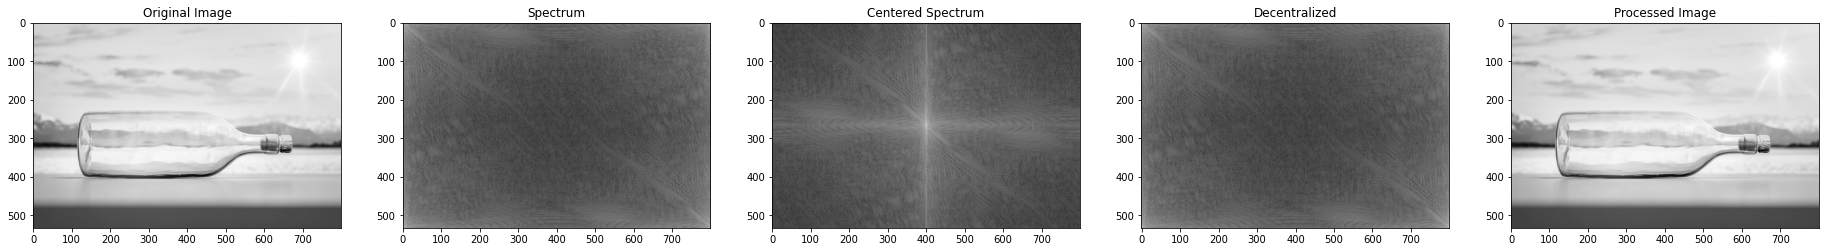

In [17]:
plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

plt.subplot(151), plt.imshow(img, "gray"), plt.title("Original Image")
plt.subplot(152), plt.imshow(np.log(1+np.abs(img_c2)), "gray"), plt.title("Spectrum")
plt.subplot(153), plt.imshow(np.log(1+np.abs(img_c3)), "gray"), plt.title("Centered Spectrum")
plt.subplot(154), plt.imshow(np.log(1+np.abs(img_c4)), "gray"), plt.title("Decentralized")
plt.subplot(155), plt.imshow(np.abs(img_c5), "gray"), plt.title("Processed Image")

In [ ]:
img

array([[ 58,  60,  49, ..., 150, 147, 143],
       [ 54,  58,  52, ..., 149, 148, 144],
       [ 54,  57,  58, ..., 149, 148, 145],
       ...,
       [105, 113, 112, ...,  38,  34,  30],
       [105, 111, 107, ...,  42,  37,  33],
       [105,  95,  87, ...,  41,  35,  33]], dtype=uint8)

In [ ]:
np.abs(img_c5)

array([[ 58.,  60.,  49., ..., 150., 147., 143.],
       [ 54.,  58.,  52., ..., 149., 148., 144.],
       [ 54.,  57.,  58., ..., 149., 148., 145.],
       ...,
       [105., 113., 112., ...,  38.,  34.,  30.],
       [105., 111., 107., ...,  42.,  37.,  33.],
       [105.,  95.,  87., ...,  41.,  35.,  33.]])

In [ ]:
img_c5

array([[ 58.+6.36900602e-16j,  60.+2.37890718e-14j,  49.+2.62557854e-14j,
        ..., 150.+2.04576488e-14j, 147.+1.64154925e-14j,
        143.+4.86887171e-15j],
       [ 54.-1.71644117e-14j,  58.-1.30042909e-15j,  52.-8.79431077e-15j,
        ..., 149.-1.15695855e-14j, 148.-1.03852743e-14j,
        144.-9.60339459e-15j],
       [ 54.+4.60705814e-15j,  57.+1.21317300e-14j,  58.+1.29775180e-14j,
        ..., 149.-3.07962636e-16j, 148.+1.03847610e-14j,
        145.-2.56844659e-14j],
       ...,
       [105.-1.55053040e-14j, 113.-1.43619544e-14j, 112.-1.79534898e-14j,
        ...,  38.-3.01859750e-14j,  34.-1.02086410e-14j,
         30.-1.42444506e-14j],
       [105.-1.71581301e-14j, 111.+1.94736513e-14j, 107.+7.54010469e-16j,
        ...,  42.-9.08052267e-16j,  37.+3.97563831e-15j,
         33.-1.11894992e-14j],
       [105.+1.04510234e-14j,  95.+2.99527438e-14j,  87.+1.62506027e-15j,
        ...,  41.+1.10450871e-15j,  35.+1.17171155e-14j,
         33.+1.93785730e-14j]])

In [ ]:
# Ideal Low Pass and Ideal High Pass Filters

In [19]:
def distance(point1,point2):
    return sqrt((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2)

In [20]:
#Ideal Low Pass and Ideal High Pass Filter Functions

def idealFilterLP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            if distance((y,x),center) < D0:
                base[y,x] = 1
    return base


def idealFilterHP(D0,imgShape):
    base = np.ones(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            if distance((y,x),center) < D0:
                base[y,x] = 0
    return base

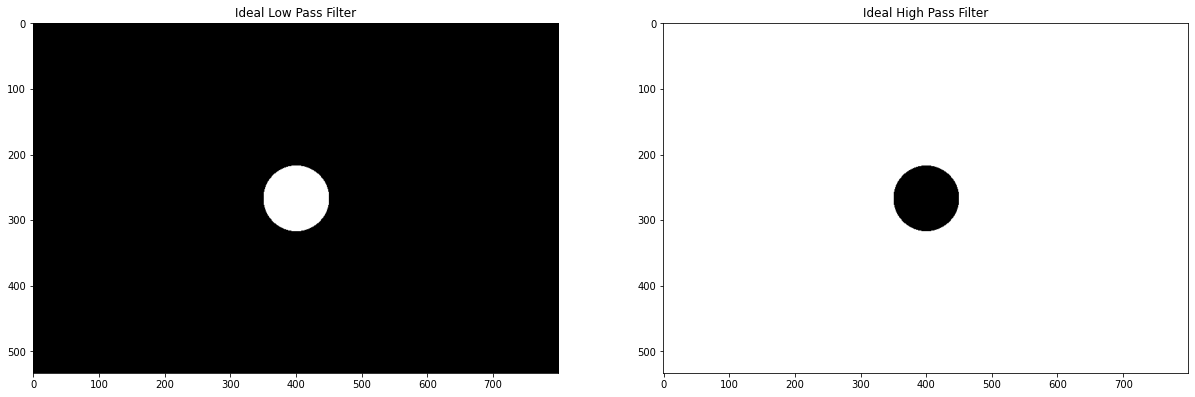

In [21]:
plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

LowPass = idealFilterLP(50,img.shape)
plt.subplot(131), plt.imshow(LowPass, "gray"), plt.title("Ideal Low Pass Filter")

HighPass = idealFilterHP(50,img.shape)
plt.subplot(132), plt.imshow(HighPass, "gray"), plt.title("Ideal High Pass Filter")

plt.show()

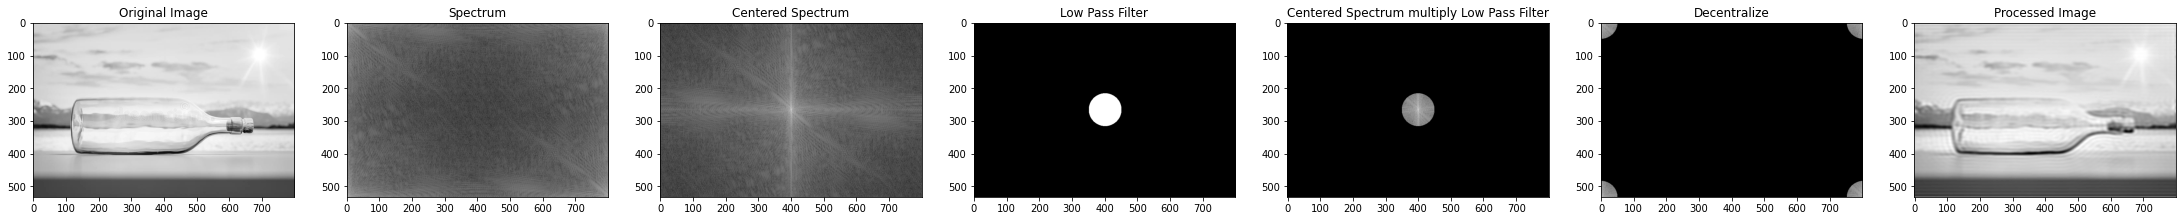

In [22]:
#Ideal Low Pass Filter
plt.figure(figsize=(6.4*6, 4.8*6), constrained_layout=False)
plt.subplot(171), plt.imshow(img, "gray"), plt.title("Original Image")

original = np.fft.fft2(img)
plt.subplot(172), plt.imshow(np.log(1+np.abs(original)), "gray"), plt.title("Spectrum")

center = np.fft.fftshift(original)
plt.subplot(173), plt.imshow(np.log(1+np.abs(center)), "gray"), plt.title("Centered Spectrum")

lowPassFilter = idealFilterLP(50,img.shape)
plt.subplot(174), plt.imshow(np.log(1+np.abs(lowPassFilter)), "gray"), plt.title("Low Pass Filter")

LowPassCenter = center * idealFilterLP(50,img.shape)
plt.subplot(175), plt.imshow(np.log(1+np.abs(LowPassCenter)), "gray"), plt.title("Centered Spectrum multiply Low Pass Filter")

LowPass = np.fft.ifftshift(LowPassCenter)
plt.subplot(176), plt.imshow(np.log(1+np.abs(LowPass)), "gray"), plt.title("Decentralize")

inverse_LowPass = np.fft.ifft2(LowPass)
plt.subplot(177), plt.imshow(np.abs(inverse_LowPass), "gray"), plt.title("Processed Image")

plt.show()

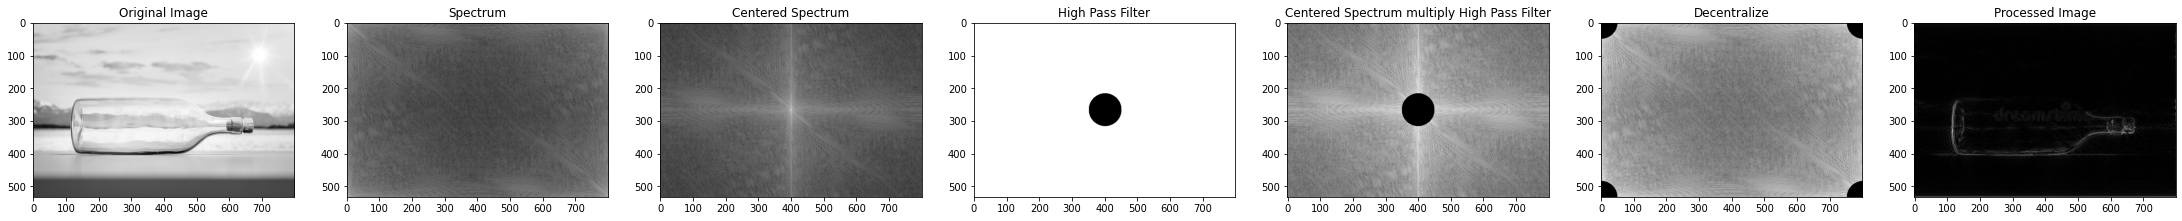

In [23]:
#Ideal High Pass Filter
plt.figure(figsize=(6.4*6, 4.8*6), constrained_layout=False)

plt.subplot(171), plt.imshow(img, "gray"), plt.title("Original Image")

original = np.fft.fft2(img)
plt.subplot(172), plt.imshow(np.log(1+np.abs(original)), "gray"), plt.title("Spectrum")

center = np.fft.fftshift(original)
plt.subplot(173), plt.imshow(np.log(1+np.abs(center)), "gray"), plt.title("Centered Spectrum")

highPassFilter = idealFilterHP(50,img.shape)
plt.subplot(174), plt.imshow(np.log(1+np.abs(highPassFilter)), "gray"), plt.title("High Pass Filter")

HighPassCenter = center * idealFilterHP(50,img.shape)
plt.subplot(175), plt.imshow(np.log(1+np.abs(HighPassCenter)), "gray"), plt.title("Centered Spectrum multiply High Pass Filter")

HighPass = np.fft.ifftshift(HighPassCenter)
plt.subplot(176), plt.imshow(np.log(1+np.abs(HighPass)), "gray"), plt.title("Decentralize")

inverse_HighPass = np.fft.ifft2(HighPass)
plt.subplot(177), plt.imshow(np.abs(inverse_HighPass), "gray"), plt.title("Processed Image")

plt.show()

In [24]:
#Butterworth Lowpass and Highpass Filter Functions

def butterworthLP(D0,imgShape,n):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = 1/(1+(distance((y,x),center)/D0)**(2*n))
    return base


def butterworthHP(D0,imgShape,n):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = 1-1/(1+(distance((y,x),center)/D0)**(2*n))
    return base

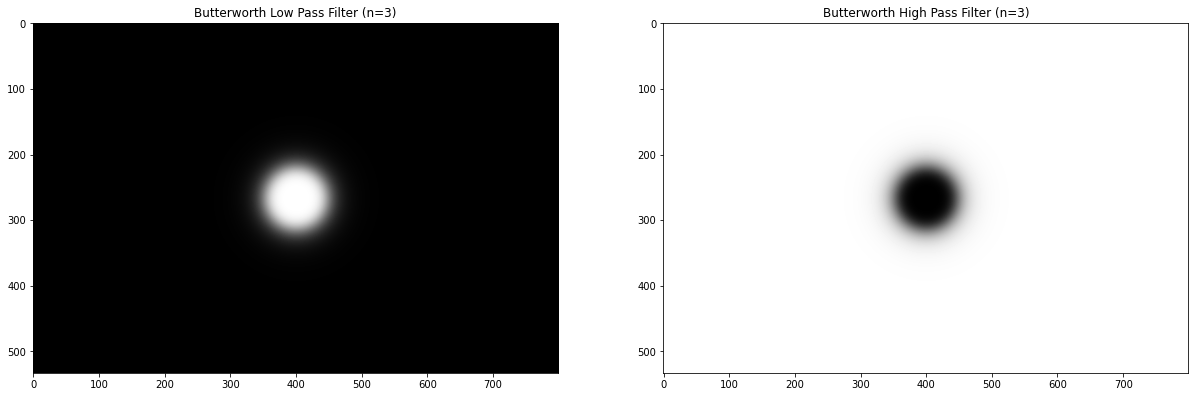

In [25]:
plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

LowPass = butterworthLP(50,img.shape,3)
plt.subplot(131), plt.imshow(LowPass, "gray"), plt.title("Butterworth Low Pass Filter (n=3)")

HighPass = butterworthHP(50,img.shape,3)
plt.subplot(132), plt.imshow(HighPass, "gray"), plt.title("Butterworth High Pass Filter (n=3)")

plt.show()

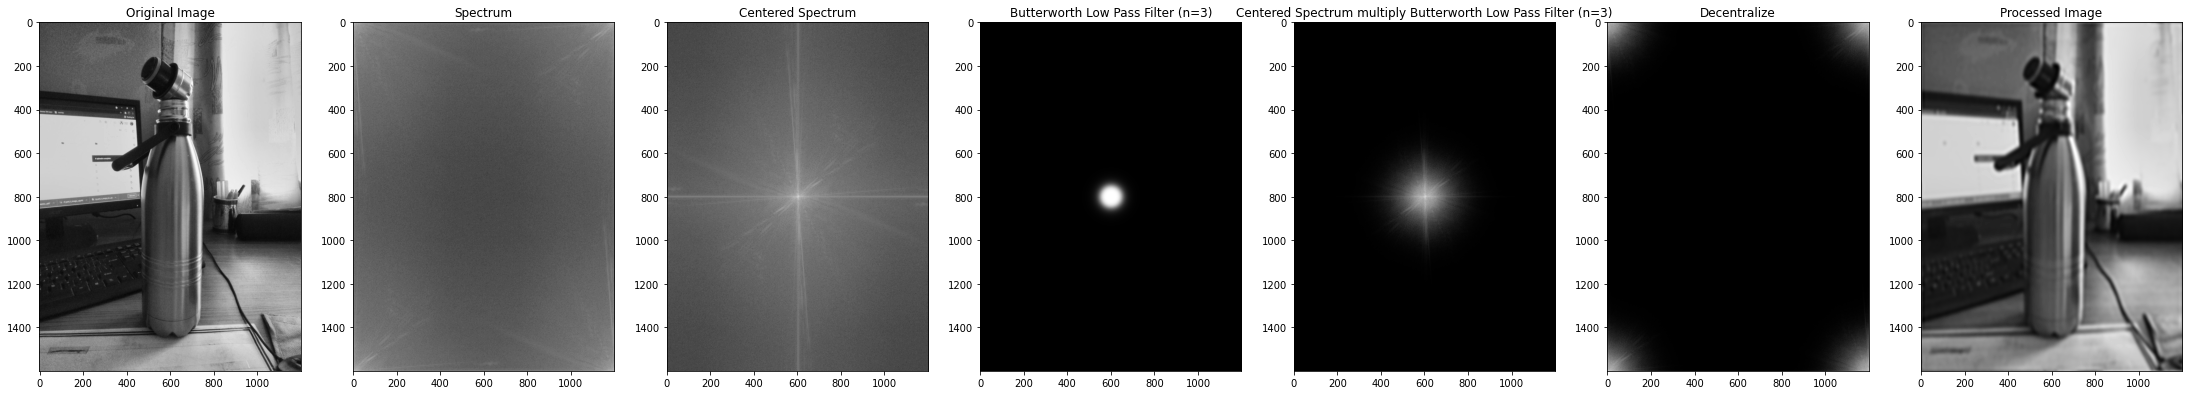

In [ ]:
#Butterworth Low Pass Filter
plt.figure(figsize=(6.4*6, 4.8*6), constrained_layout=False)

plt.subplot(171), plt.imshow(img, "gray"), plt.title("Original Image")

original = np.fft.fft2(img)
plt.subplot(172), plt.imshow(np.log(1+np.abs(original)), "gray"), plt.title("Spectrum")

center = np.fft.fftshift(original)
plt.subplot(173), plt.imshow(np.log(1+np.abs(center)), "gray"), plt.title("Centered Spectrum")

butterworthLowPassFilter = butterworthLP(50,img.shape,3)
plt.subplot(174), plt.imshow(np.log(1+np.abs(butterworthLowPassFilter)), "gray"), plt.title("Butterworth Low Pass Filter (n=3)")

butterworthLowPassCenter = center * butterworthLP(50,img.shape,3)
plt.subplot(175), plt.imshow(np.log(1+np.abs(butterworthLowPassCenter)), "gray"), plt.title("Centered Spectrum multiply Butterworth Low Pass Filter (n=3)")

butterworthLowPass = np.fft.ifftshift(butterworthLowPassCenter)
plt.subplot(176), plt.imshow(np.log(1+np.abs(butterworthLowPass)), "gray"), plt.title("Decentralize")

inverse_butterworthLowPass = np.fft.ifft2(butterworthLowPass)
plt.subplot(177), plt.imshow(np.abs(inverse_butterworthLowPass), "gray"), plt.title("Processed Image")

plt.show()

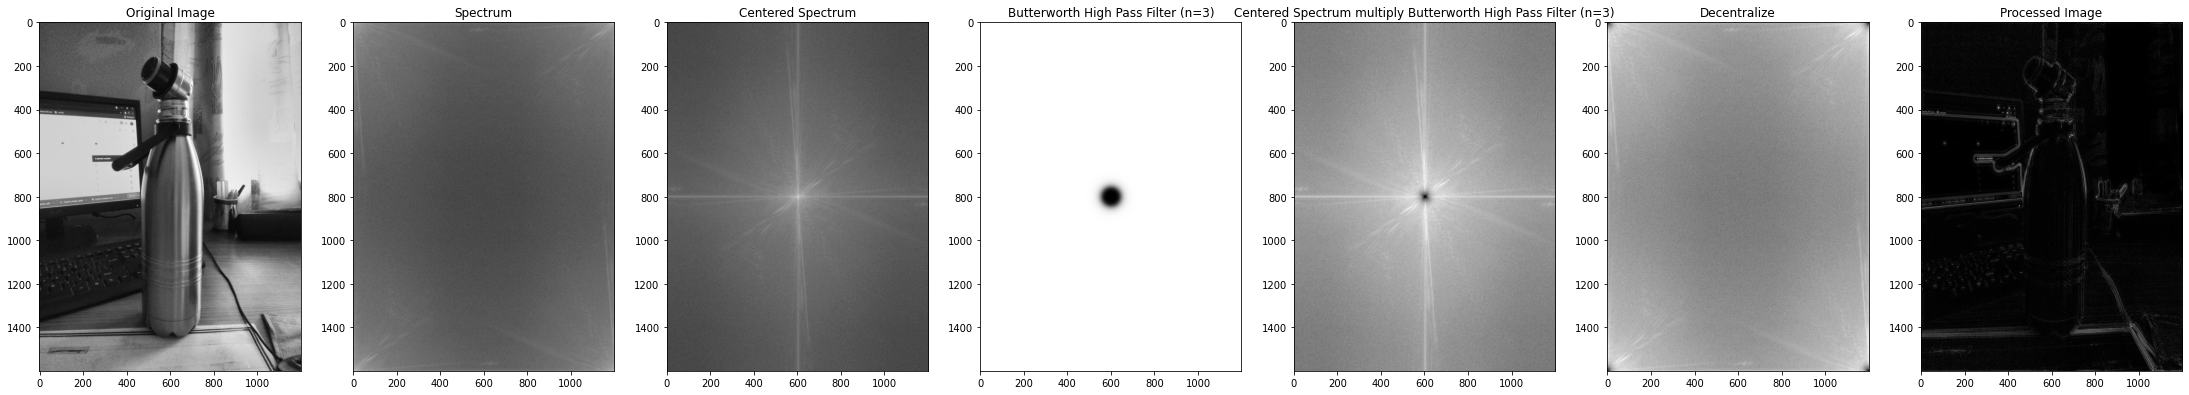

In [ ]:
#Butterworth High Pass Filter
plt.figure(figsize=(6.4*6, 4.8*6), constrained_layout=False)

plt.subplot(171), plt.imshow(img, "gray"), plt.title("Original Image")

original = np.fft.fft2(img)
plt.subplot(172), plt.imshow(np.log(1+np.abs(original)), "gray"), plt.title("Spectrum")

center = np.fft.fftshift(original)
plt.subplot(173), plt.imshow(np.log(1+np.abs(center)), "gray"), plt.title("Centered Spectrum")

butterworthHighPassFilter = butterworthHP(50,img.shape,3)
plt.subplot(174), plt.imshow(np.log(1+np.abs(butterworthHighPassFilter)), "gray"), plt.title("Butterworth High Pass Filter (n=3)")

butterworthHighPassCenter = center * butterworthHP(50,img.shape,3)
plt.subplot(175), plt.imshow(np.log(1+np.abs(butterworthHighPassCenter)), "gray"), plt.title("Centered Spectrum multiply Butterworth High Pass Filter (n=3)")

butterworthHighPass = np.fft.ifftshift(butterworthHighPassCenter)
plt.subplot(176), plt.imshow(np.log(1+np.abs(butterworthHighPass)), "gray"), plt.title("Decentralize")

inverse_butterworthHighPass = np.fft.ifft2(butterworthHighPass)
plt.subplot(177), plt.imshow(np.abs(inverse_butterworthHighPass), "gray"), plt.title("Processed Image")

plt.show()

In [26]:
#Gaussian Lowpass and Highpass Filter Functions

def gaussianLP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = exp(((-distance((y,x),center)**2)/(2*(D0**2))))
    return base


def gaussianHP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = 1 - exp(((-distance((y,x),center)**2)/(2*(D0**2))))
    return base

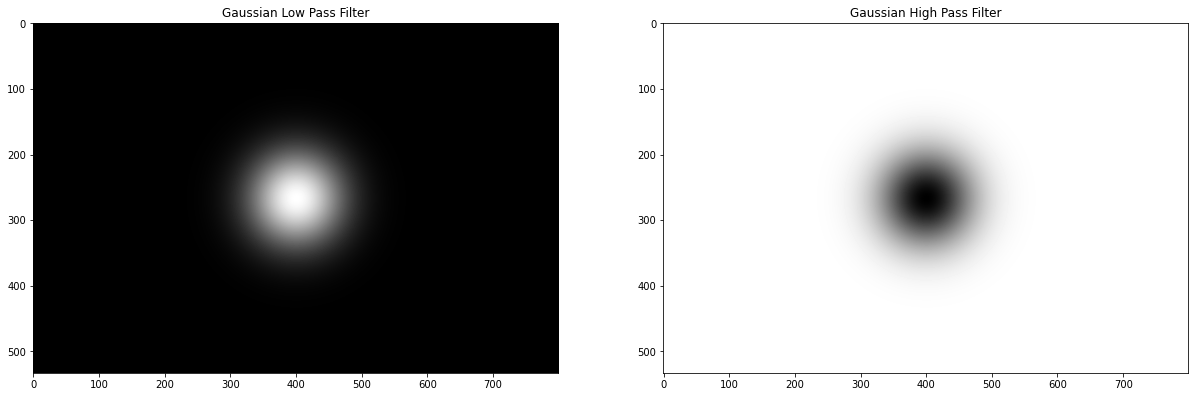

In [27]:
plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

LowPass = gaussianLP(50,img.shape)
plt.subplot(131), plt.imshow(LowPass, "gray"), plt.title("Gaussian Low Pass Filter")

HighPass = gaussianHP(50,img.shape)
plt.subplot(132), plt.imshow(HighPass, "gray"), plt.title("Gaussian High Pass Filter")

plt.show()

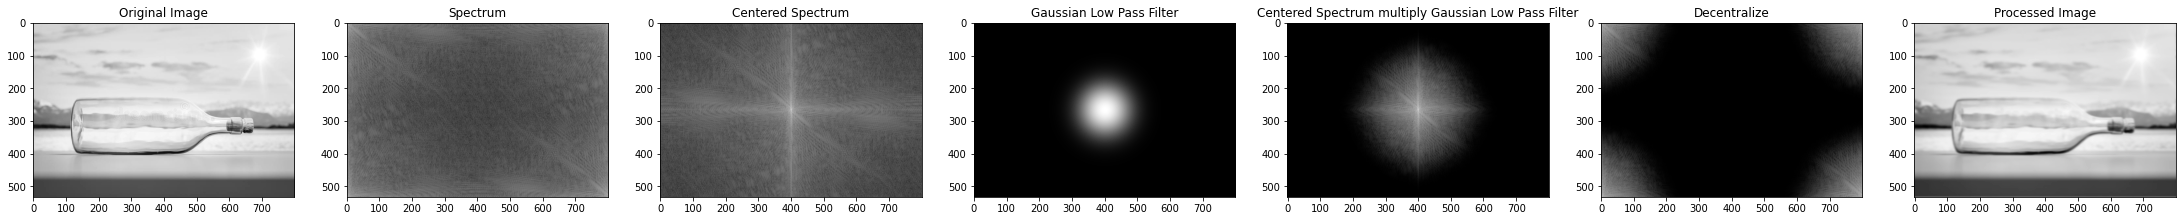

In [28]:
#Gaussian Low Pass Filter 
plt.figure(figsize=(6.4*6, 4.8*6), constrained_layout=False)

plt.subplot(171), plt.imshow(img, "gray"), plt.title("Original Image")

original = np.fft.fft2(img)
plt.subplot(172), plt.imshow(np.log(1+np.abs(original)), "gray"), plt.title("Spectrum")

center = np.fft.fftshift(original)
plt.subplot(173), plt.imshow(np.log(1+np.abs(center)), "gray"), plt.title("Centered Spectrum")

gaussianLowPassFilter = gaussianLP(50,img.shape)
plt.subplot(174), plt.imshow(np.log(1+np.abs(gaussianLowPassFilter)), "gray"), plt.title("Gaussian Low Pass Filter")

gaussianLowPassCenter = center * gaussianLP(50,img.shape)
plt.subplot(175), plt.imshow(np.log(1+np.abs(gaussianLowPassCenter)), "gray"), plt.title("Centered Spectrum multiply Gaussian Low Pass Filter")

gaussianLowPass = np.fft.ifftshift(gaussianLowPassCenter)
plt.subplot(176), plt.imshow(np.log(1+np.abs(gaussianLowPass)), "gray"), plt.title("Decentralize")

inverse_gaussianLowPass = np.fft.ifft2(gaussianLowPass)
plt.subplot(177), plt.imshow(np.abs(inverse_gaussianLowPass), "gray"), plt.title("Processed Image")

plt.show()

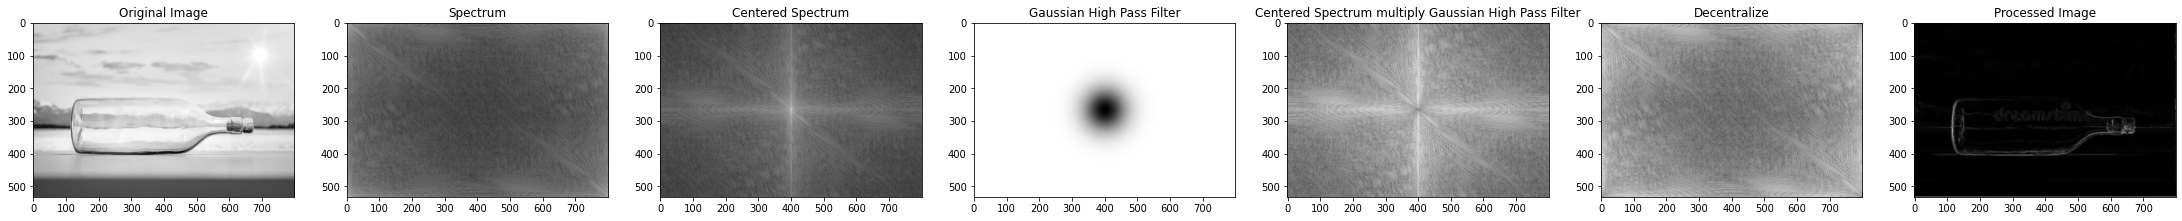

In [29]:
#Gausssian High Pass Filter
plt.figure(figsize=(6.4*6, 4.8*6), constrained_layout=False)

plt.subplot(171), plt.imshow(img, "gray"), plt.title("Original Image")

original = np.fft.fft2(img)
plt.subplot(172), plt.imshow(np.log(1+np.abs(original)), "gray"), plt.title("Spectrum")

center = np.fft.fftshift(original)
plt.subplot(173), plt.imshow(np.log(1+np.abs(center)), "gray"), plt.title("Centered Spectrum")

gaussianHighPassFilter = gaussianHP(50,img.shape)
plt.subplot(174), plt.imshow(np.log(1+np.abs(gaussianHighPassFilter)), "gray"), plt.title("Gaussian High Pass Filter")

gaussianHighPassCenter = center * gaussianHP(50,img.shape)
plt.subplot(175), plt.imshow(np.log(1+np.abs(gaussianHighPassCenter)), "gray"), plt.title("Centered Spectrum multiply Gaussian High Pass Filter")

gaussianHighPass = np.fft.ifftshift(gaussianHighPassCenter)
plt.subplot(176), plt.imshow(np.log(1+np.abs(gaussianHighPass)), "gray"), plt.title("Decentralize")

inverse_gaussianHighPass = np.fft.ifft2(gaussianHighPass)
plt.subplot(177), plt.imshow(np.abs(inverse_gaussianHighPass), "gray"), plt.title("Processed Image")

plt.show()

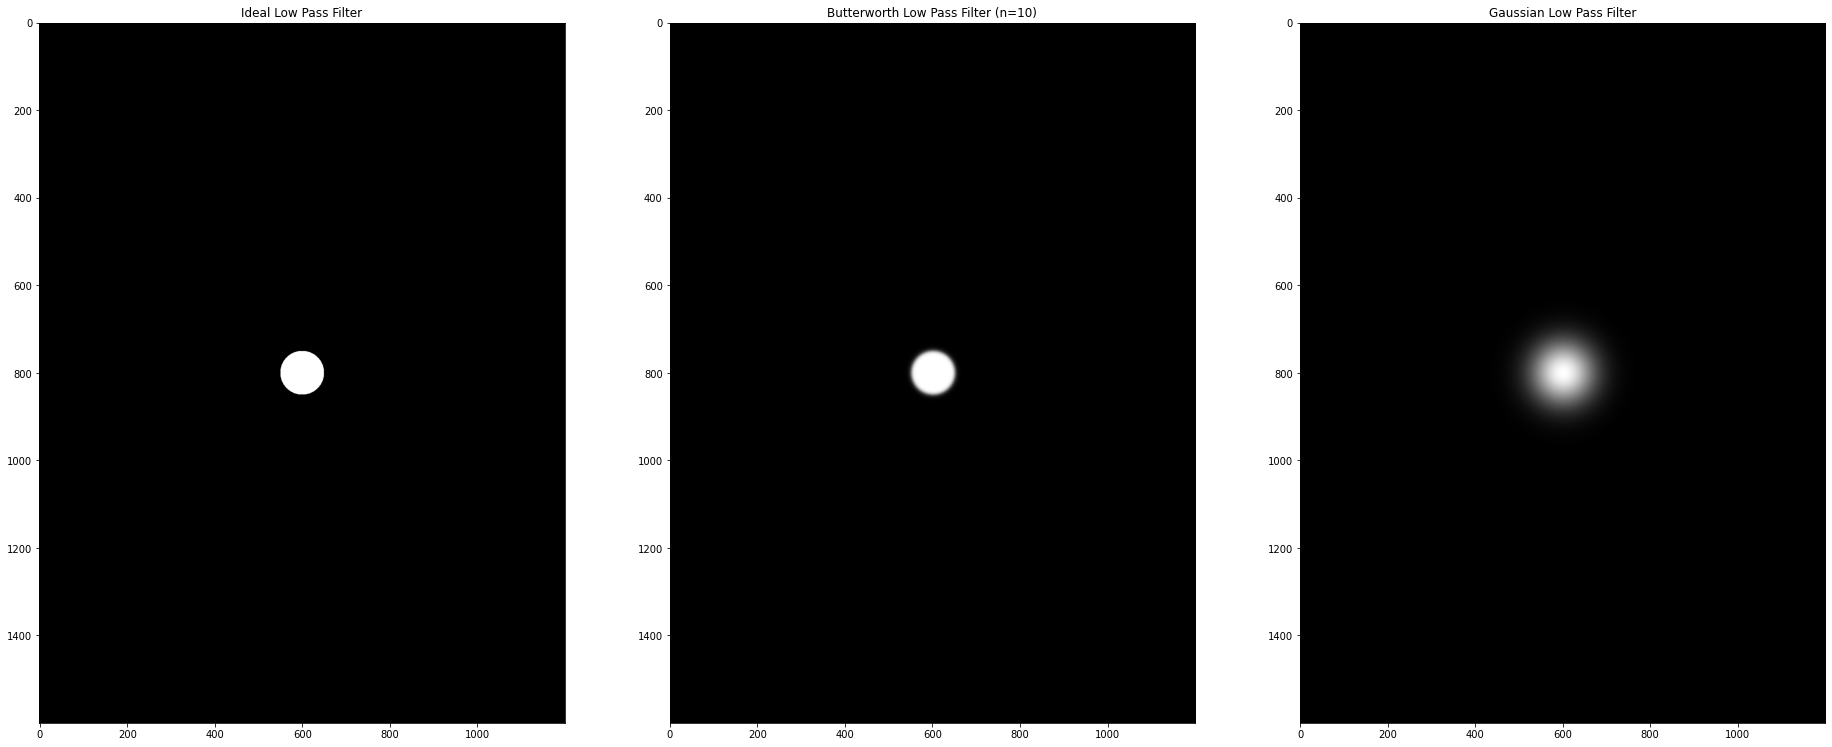

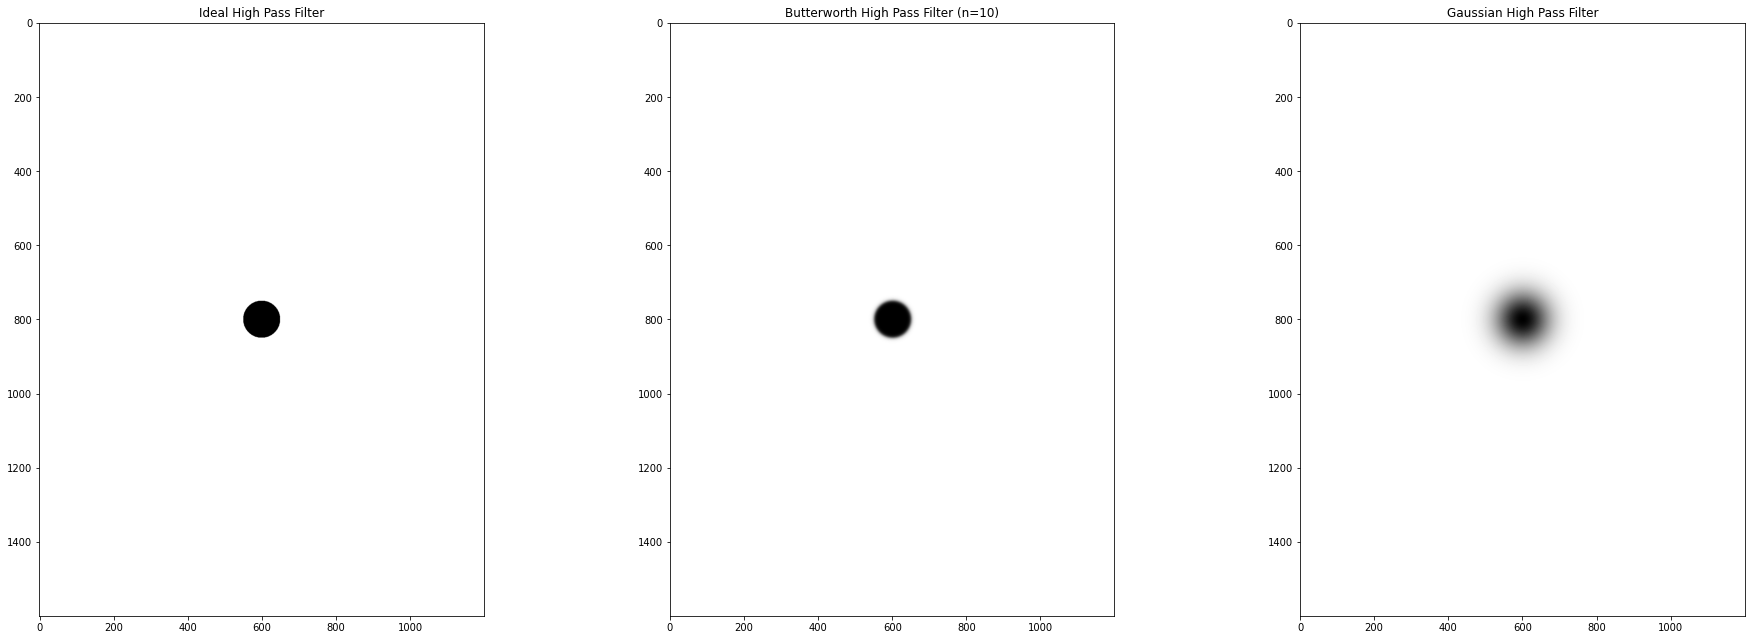

In [ ]:
#Comparing different filters by plotting them side by side
plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

IdealLP = idealFilterLP(50,img.shape)
plt.subplot(131), plt.imshow(IdealLP, "gray"), plt.title("Ideal Low Pass Filter")

ButterLP = butterworthLP(50,img.shape,10)
plt.subplot(132), plt.imshow(ButterLP, "gray"), plt.title("Butterworth Low Pass Filter (n=10)")

GaussianLP = gaussianLP(50,img.shape)
plt.subplot(133), plt.imshow(GaussianLP, "gray"), plt.title("Gaussian Low Pass Filter")

plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)
IdealHP = idealFilterHP(50,img.shape)
plt.subplot(231), plt.imshow(IdealHP, "gray"), plt.title("Ideal High Pass Filter")

ButterHP = butterworthHP(50,img.shape,10)
plt.subplot(232), plt.imshow(ButterHP, "gray"), plt.title("Butterworth High Pass Filter (n=10)")

GaussianHP = gaussianHP(50,img.shape)
plt.subplot(233), plt.imshow(GaussianHP, "gray"), plt.title("Gaussian High Pass Filter")

plt.show()

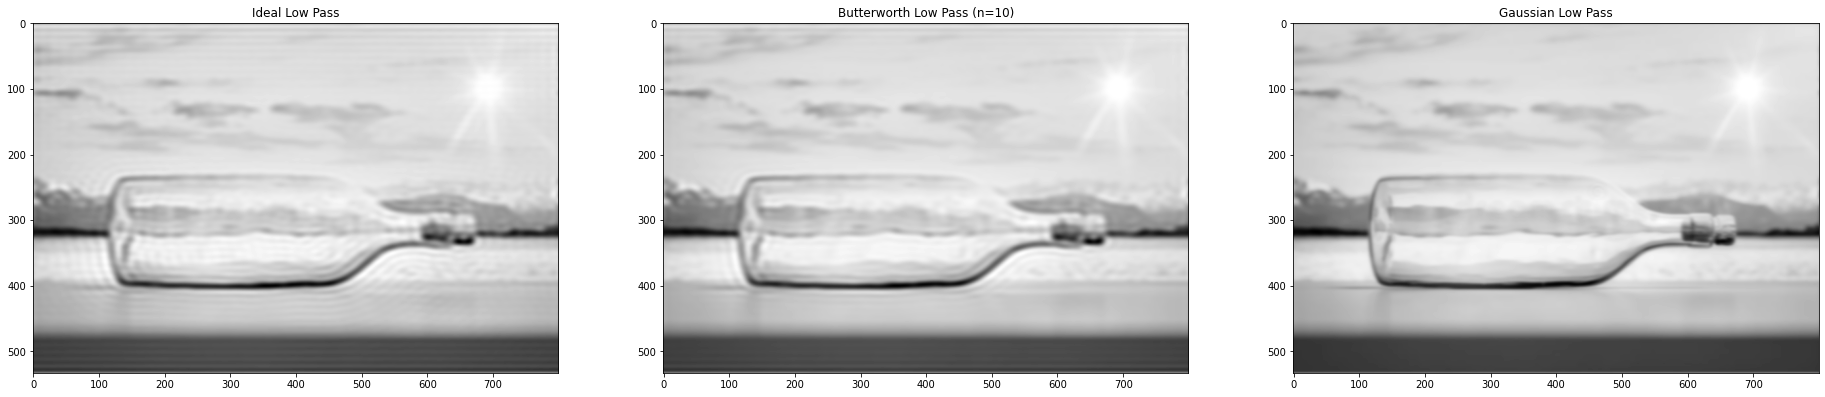

In [31]:
#Comparing different outputs of different fiters by plotting them side by side
#Here we are comparing outputs from low pass: ideal, buuterwoth and gaussian filter
original = np.fft.fft2(img)
center = np.fft.fftshift(original)

plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

LowPassCenter = center * idealFilterLP(50,img.shape)
LowPass = np.fft.ifftshift(LowPassCenter)
inverse_LowPass = np.fft.ifft2(LowPass)
plt.subplot(131), plt.imshow(np.abs(inverse_LowPass), "gray"), plt.title("Ideal Low Pass")

LowPassCenter = center * butterworthLP(50,img.shape,10)
LowPass = np.fft.ifftshift(LowPassCenter)
inverse_LowPass = np.fft.ifft2(LowPass)
plt.subplot(132), plt.imshow(np.abs(inverse_LowPass), "gray"), plt.title("Butterworth Low Pass (n=10)")

LowPassCenter = center * gaussianLP(50,img.shape)
LowPass = np.fft.ifftshift(LowPassCenter)
inverse_LowPass = np.fft.ifft2(LowPass)
plt.subplot(133), plt.imshow(np.abs(inverse_LowPass), "gray"), plt.title("Gaussian Low Pass")

plt.show()

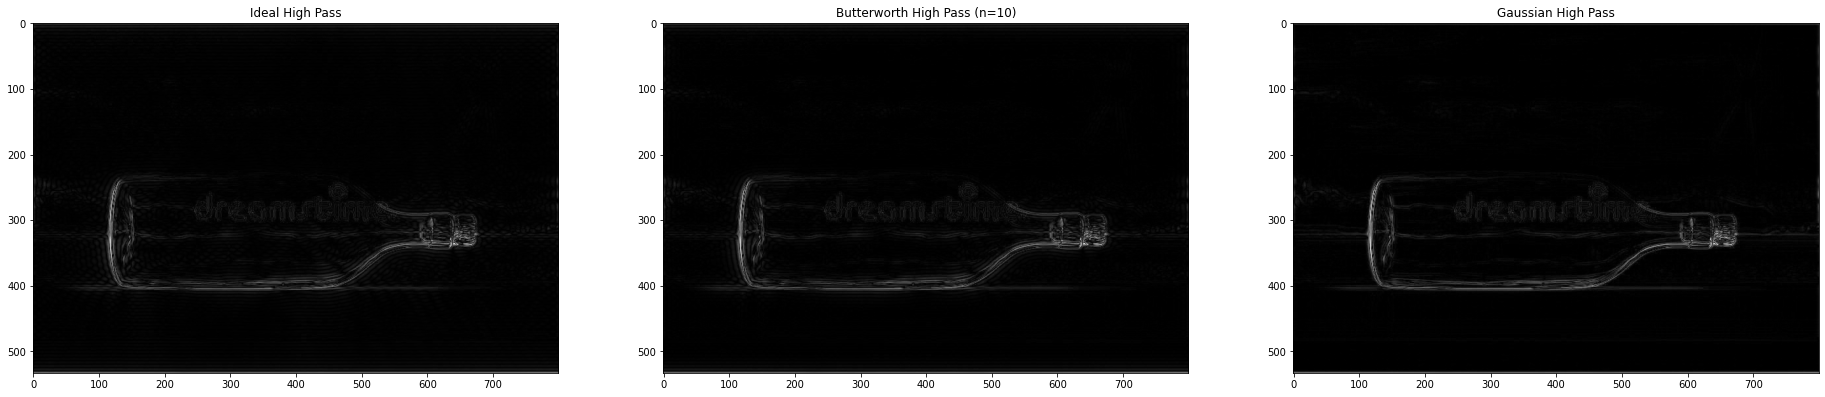

In [30]:
#Here we are comparing outputs from high pass: ideal, buuterwoth and gaussian filter
original = np.fft.fft2(img)
center = np.fft.fftshift(original)

plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

HighPassCenter = center * idealFilterHP(50,img.shape)
HighPass = np.fft.ifftshift(HighPassCenter)
inverse_HighPass = np.fft.ifft2(HighPass)
plt.subplot(131), plt.imshow(np.abs(inverse_HighPass), "gray"), plt.title("Ideal High Pass")

HighPassCenter = center * butterworthHP(50,img.shape,10)
HighPass = np.fft.ifftshift(HighPassCenter)
inverse_HighPass = np.fft.ifft2(HighPass)
plt.subplot(132), plt.imshow(np.abs(inverse_HighPass), "gray"), plt.title("Butterworth High Pass (n=10)")

HighPassCenter = center * gaussianHP(50,img.shape)
HighPass = np.fft.ifftshift(HighPassCenter)
inverse_HighPass = np.fft.ifft2(HighPass)
plt.subplot(133), plt.imshow(np.abs(inverse_HighPass), "gray"), plt.title("Gaussian High Pass")

plt.show()

In [ ]:
#============================================End==================================